Лабораторная работа №1
=

Исходное задание
===
Вариант 4.
Для набора данных потенциальных покупателей разработать модель для прогнозирования общей суммы, которую клиенты готовы заплатить за новый автомобиль. Построить регрессионную модель для целевого признака «Car Purchase Amount» (сумма покупки автомобиля) от остальных входных признаков.
1. Пункт 3.h – Min-max масштабирование
2. Пункт 4 – лассо-реrрессия (регуляризованная линейная регрессия)

1). Загрузка необходимых библиотек
===
Производим импорт необходимых библиотек. Требуемые библиотеки можно условно разделить на два блока:
1. Библиотеки для работы с данными и их вывода в табличном либо графическом виде
2. Библиотека sklearn - как набор средств машинного обучения

In [4]:
# Блок 1: Работа с данными и их вывод
import pandas as pd # pandas для работы с набором данных в табличном виде
import numpy as np # numpy как основа для числовых операций и преобразований
import matplotlib.pyplot as plt # matplotlib для отрисовки большинства графиков
import seaborn as sns # seaborn для отрисовки корреляционной матрицы
# Блок 2: sklearn, как основной поставщик функциональности для машинного обучения
# LabelEncoder используется для преобразования категориальных признаков в числовые
from sklearn.preprocessing import LabelEncoder
# Функция train_test_split() используется для разделения набора данных на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
# MinMaxScaler осуществляет Min-max масштабирование набора данных (по варианту)
from sklearn.preprocessing import MinMaxScaler
# Класс Lasso - реализация Lasso-регрессии, имеет общий базовый интерфейс с другими моделями обучения sklearn
from sklearn.linear_model import Lasso
# mean_squared_error() - функция поиска RMSE (средне-квадратичной ошибки)
# r2_score() - функция поиска R^2 - коэффициента детерминации
# Работают путём сравнения целевых значений тестового набора и спрогнозированных с помощью модели целевых значений
from sklearn.metrics import mean_squared_error, r2_score
# PolynomialFeatures - средство генерации параметров полиномиальной регрессии
from sklearn.preprocessing import PolynomialFeatures
# Класс LinearRegression - реализация линейной регрессии, используется и для полиномильной
from sklearn.linear_model import LinearRegression
# GridSearchCV осуществляет grid-поиск наилучших гиперпараметров
from sklearn.model_selection import GridSearchCV
# SelectKBest() - выборка K наиболее информативных параметров
# f_regression используется, как источник параметров для SelectKBest при применении к линейной регрессии
from sklearn.feature_selection import SelectKBest, f_regression

2). Загрузка исходных данных
===
Сначала необходимо загрузить исходный набор данных. Будем работать по простому сценарию, когда файл с данными в распакованном виде находится в той же директории, где и сам сценарий Python или тетрадь Jupyter.

In [6]:
# Загружаем исходный набор данных
data = pd.read_csv("V4.csv")

3). Разведочный анализ данных
===
Производим разведочный анализ данных в соответствии с этапами, описанными в файле примера.

Единственное, что мы знаем, не изучив исходный файл - это то, что он отражает табличные данные (формат CSV), т.е. состоит из строк, отражающих отдельные записи, и столбцов, отражающих свойства этих записей. Набор свойств у всех записей одинаков (согласно перечню колонок), однако некоторые столбцы у конкретной строки могут быть не заполнены, и в ходе дальнейшей очистки данных необходимо будет так или иначе избавиться от пустот, либо заполнив данные, либо избавившся от соответствующих строк либо столбцов.

3.a). Ознакомление с данными с помощью методов описательной статистики
====
Сначала необходимо проанализировать характер таблицы: её пространственные характеристики (ширина, высота), набор столбцов, а также общий вид нескольких столбцов из начала таблицы для общего понимания её структуры.

Сначала выводем размерность набора данных

In [10]:
data.shape

(500, 10)

Набор данных представляет из себя таблицу из 500 строк и 10 столбцов

Далее выведем типы данных для каждой из колонок

In [13]:
data.dtypes

Unnamed: 0               int64
Customer Name           object
Customer e-mail         object
Country                 object
Gender                 float64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object

Выводим первые 5 строчек для визуального осмотра характера данных.

In [15]:
data.head()

,Unnamed: 0,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0.0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0.0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,NaN,43,53798.55112,11160.355060,638467.1773,42925.70921
3,3,Jade Cunningham,malesuada@dignissim.com,USA,NaN,58,79370.03798,14426.164850,548599.0524,67422.36313
4,4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1.0,57,59729.15130,5358.712177,560304.0671,55915.46248


Таблица содержит следующие столбцы:
- "Unnamed: 0" - безымянный столбец, очевидно содержащий (уникальные) индексы записей, то есть их порядковые номера
- Customer Name - имя клиента, в имеющихся строках имеет формат "имя фамилия"
- Customer e-mail - адрес электронной почты клиента
- Country - страна, для записей из начала имеет значение USA
- Gender - пол, кодируется дробными числами 0.0 (предположительно женский), 1.0 (предположительно мужской), у части записей отсутствует (значение NaN)
- Age - возраст, целое число
- Annual Salary - годовая зарплата, поскольку в данных нет поля валюты, очевидно должна быть в одной валюте, чтобы данные были совместимыми
- Credit Card Debt - задолженность по кредитной карте
- Net Worth - общее состояние без учёта долгов
- Car Purchase Amount - целевой параметр: сумма, которую клиент готов потратить на покупку автомобиля

Отметим, что в первом поле (Unnamed: 0) отмечается только индекс записи, и смысловой нагрузки для статистической обработки оно не несёт.

Столбцы Customer Name, Customer e-mail и Country являются строковыми, и их нужно будет либо преообразовать в числовой вид, либо убрать из набора данных перед обучением.

Выводим сводную информацию о наборе данных

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           500 non-null    int64  
 1   Customer Name        500 non-null    object 
 2   Customer e-mail      500 non-null    object 
 3   Country              500 non-null    object 
 4   Gender               244 non-null    float64
 5   Age                  500 non-null    int64  
 6   Annual Salary        500 non-null    float64
 7   Credit Card Debt     500 non-null    float64
 8   Net Worth            500 non-null    float64
 9   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 39.2+ KB


Отметим, что поле Gender для более чем половины записей не заполнено, и в ходе очистки его нужно будет преобразовать.

Выведем базовые статистические данные по полям, в том числе и количество значений, среднее, минимумы-максимумы.

In [21]:
pd.set_option('display.precision',3)
data.describe()

,Unnamed: 0,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000,244.000,500.000,500.000,500.000,500.000,500.000
mean,249.500,0.500,46.224,62127.240,9607.645,431475.714,44209.799
std,144.482,0.501,7.990,11703.378,3489.188,173536.756,10773.179
min,0.000,0.000,20.000,20000.000,100.000,20000.000,9000.000
25%,124.750,0.000,41.000,54391.977,7397.516,299824.196,37629.896
50%,249.500,0.500,46.000,62915.497,9655.036,426750.121,43997.783
75%,374.250,1.000,52.000,70117.862,11798.867,557324.479,51254.710
max,499.000,1.000,70.000,100000.000,20000.000,1000000.000,80000.000


Из средних значений можем отметить средний возраст клиентов в выборке 46 лет, среднюю заработную плату в 62127 У.Е., состояние 431475 У.Е., и среднюю стоимость покупки автомобиля в 44209 У.Е.

Наименьшая зарплата в выборке составляет 20000 У.Е, наибольшая - 10000 У.Е., 50%-перцентиль составляет 62915 У.Е. (ожидаемо близко к средней з/п).

Подсчитаем количество уникальных значений для поля Customer Name

In [24]:
data["Customer Name"].value_counts()

Customer Name
Seth                    2
Walter                  2
Martina Avila           1
Sexton, Shaeleigh H.    1
Holloway, Brennan Q.    1
                       ..
Holmes Irwin            1
Hector Price            1
Sebastian Marks         1
Marvin Garner           1
Marla                   1
Name: count, Length: 498, dtype: int64

Значения в поле Customer Name практически в полном составе уникальны (496 из 500). Отсюда можно сделать вывод, что поле Customer Name концептуально является (относительно) уникальным идентификатором клиента, и не представляет интереса для статистического анализа набора данных. Следовательно, при очистке данных его можно будет удалить из набора

Сделаем то же самое для поля Customer e-mail:

In [27]:
data["Customer e-mail"].value_counts()

Customer e-mail
cubilia.Curae.Phasellus@quisaccumsanconvallis.edu    1
mi.eleifend.egestas@cursuset.net                     1
ut@Etiamvestibulum.ca                                1
nunc.sed.pede@Quisqueporttitor.net                   1
Cras.eu@vitaevelitegestas.net                        1
                                                    ..
Nunc.sed.orci@Namligulaelit.net                      1
Aliquam.nisl@semegetmassa.co.uk                      1
et.eros@feugiatmetussit.net                          1
in@sed.org                                           1
Camaron.marla@hotmail.com                            1
Name: count, Length: 500, dtype: int64

Аналогично поле Customer e-mail имеет уникальные значения. Следовательно, при очистке данных его можно будет удалить из набора.

Тем не менее, поле Customer e-mail содержит доменное имя первого/верхнего (TLD) и дальнейших уровней, и их выделение может представлять определённый интерес с точки зрения обнаружения дополнительных зависимостей.

Средствами Regex выделим из всех адресов доменную часть, которая состоит из двух или более уровней доменов, а также отдельно домен верхнего уровня.

In [29]:
import re

full_domains = []
top_level_domains = []

for item in data["Customer e-mail"]:
    # Из почтовых адресов выделим полное доменное имя (включая домен верхнего уровня)
    # и отдельно сам домен верхнего уровня.
    matches = re.search(r'[\w\.]+@([\w\.]+\.(\w+))', item)
    # Если совпадение не найден - пропускаем строку
    if matches is None:
        continue
    # Выбранные подстроки
    full_domains.append(matches.group(1))
    top_level_domains.append(matches.group(2))
# На основании найденных подстрок сформируем датафрейм Pandas с двумя новыми столбцами и выведем его
d = {'FullDomain': full_domains, 'TLD': top_level_domains}

domain_df = pd.DataFrame(d)
domain_df

,FullDomain,TLD
0,quisaccumsanconvallis.edu,edu
1,diam.co.uk,uk
2,ametconsectetueradipiscing.co.uk,uk
3,dignissim.com,com
4,egetmollislectus.net,net
...,...,...
495,Cumsociis.ca,ca
496,Sedmolestie.edu,edu
497,massanonante.com,com
498,arcuVivamussit.net,net


В результате разбора получили набор исходной размерности по строкам (500), следовательно, значения удалось для всех строк, и их можно использовать без дозаполнения. Подсчитаем количество уникальных значений в двух столбцах.

In [31]:
domain_df['FullDomain'].value_counts()

FullDomain
ut.org                 3
orci.com               2
Aliquamfringilla.ca    2
amet.org               2
nisl.net               2
                      ..
semegetmassa.co.uk     1
feugiatmetussit.net    1
sed.org                1
sedpedeCum.org         1
hotmail.com            1
Name: count, Length: 482, dtype: int64

Доменные имены второго уровня в подавляющем большинстве являются уникальными значениями, и, следовательно также не представляют особого интереса для статистического анализа.

Аналогично проанализируем домены верхнего уровня.

In [34]:
tld_counts = domain_df['TLD'].value_counts()
tld_counts

TLD
net    91
com    88
uk     84
ca     84
org    78
edu    75
Name: count, dtype: int64

In [35]:
len(tld_counts)

6

В наборе присутствует 6 различных доменных имён верхнего уровня, и их анализ может представлять интерес. При составлении расширенного набора данных добавим в него это поле.

Перейдём к анализу остальных полей.

Поле Country по смыслу содержит не уникальные значения (названия стран). Выводим подсчёт значений.

In [38]:
data["Country"].value_counts()

Country
USA    500
Name: count, dtype: int64

Видим, что данное поле имеет значение USA для всех элементов выборки, и, следовательно, не представляет интереса для дальнейшего исследования - в ходе очистки его стоит удалить

In [40]:
data["Gender"].value_counts()

Gender
0.0    122
1.0    122
Name: count, dtype: int64

Поле Gender для непустых записей имеет ровно два значения, как и ожидается по смыслу. Оно представляет интерес с точки зрения статистики. Как отмечалось ранее, оно заполнено не для всех записей в наборе, и для его использования потребуется преобразование данных.

Первый этап очистки данных - выделение числовых полей
====
Выделим из набора данных информативные числовые поля. Будем руководствоваться следующими суждениями:
1. Поскольку строчные поля Customer Name, e-mail являются уникальными строчными идентификаторами, то для статистического численного анализа они интереса не представляют, и их можно убрать из выборки
2. Поле Unnamed 0 содержит индексы данных и также является своего рода уникальным (но уже числовым) идентификатором, отражающим порядок в исходных данных. Для статистического анализа интереса не представляет, поэтому также исключим его из выборки
3. Поле Country является строчным не уникальным, но содержит ровно 1 значение для всех элементов выборки, следовательно, его также можно исключить.
4. Поле Gender является числовым и статистически информативным, однако отсутствует у части записей. Его необходимо будет либо заполнить, либо исключить записи с нулевыми значениями.

In [43]:
numeric_fields = data.loc[:,['Gender','Age','Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']]

3.b). Визуализация данных
====
Выполним визуализацию числовых данных в двух видах:
- Одномерную для оценки распределения значений для каждого из признаков
- Многомерную для выяснения зависимостей между признаками

Отдельно визуализируем данные для прямого и расширенного набора признаков.

3.b.1). Визуализация исходного набора данных
====

Выведем гистограммы для каждого из (числовых) признаков.
Гистограммы покажут распределение значений для каждого из признаков с объединением значений в столбцы с некоторой шириной распределения значений. Поэтому они имеют ступенчатый вид.

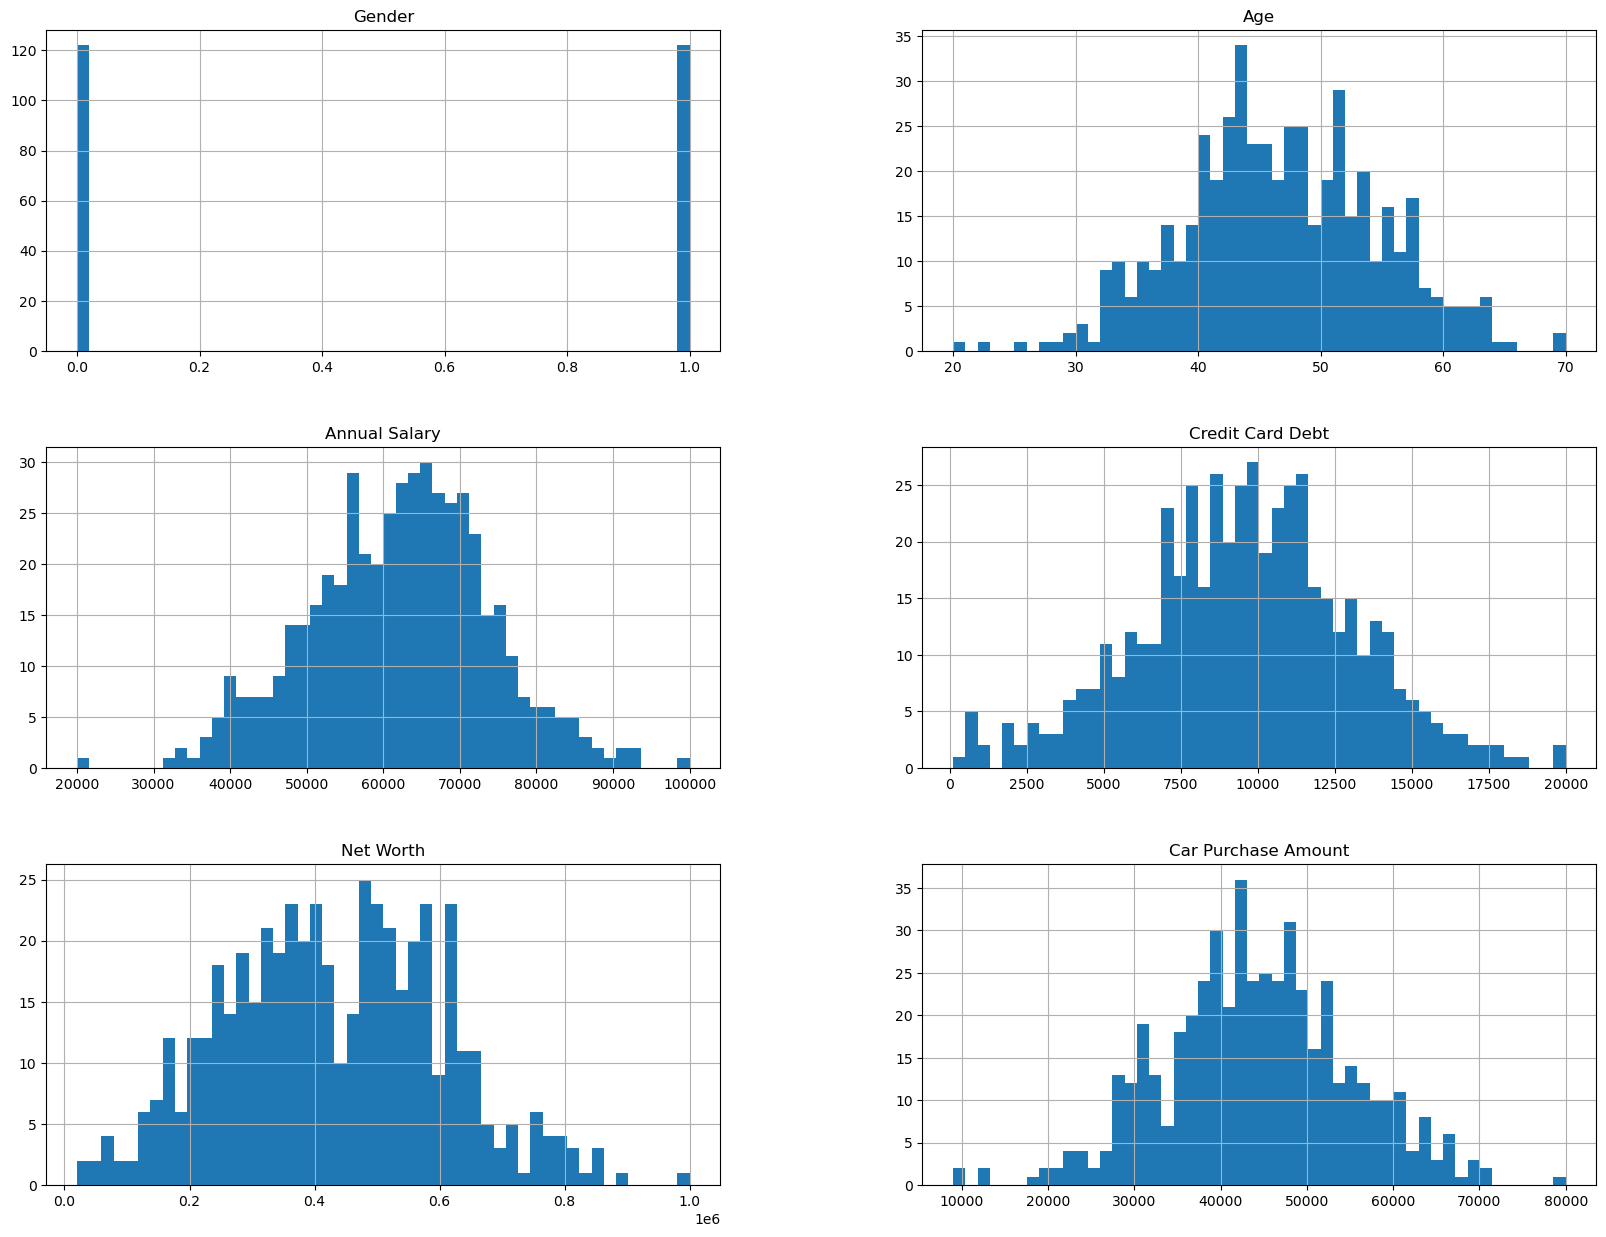

In [47]:
%matplotlib inline
numeric_fields.hist(bins=50, figsize=(20,15))
plt.show()

Гистограммы показывают, что:
- Поле Gender имеет ровно два значения (0.0 и 1.0), и значения эти распределены поровну между заполненными записями
- Остальные числовые признаки имеют распределение, близкое к нормальному (колоколообразное) - есть наиболее часто встречающаяся величина, далее вероятности значений убывают по мере отдаления от этой величины в обе стороны (уменьшения и увеличения).

Далее выведем графики плотности для тех же признаков.
Графики плотности также показывают распределение значений для признаков, но в виде гладкого линейного графика.

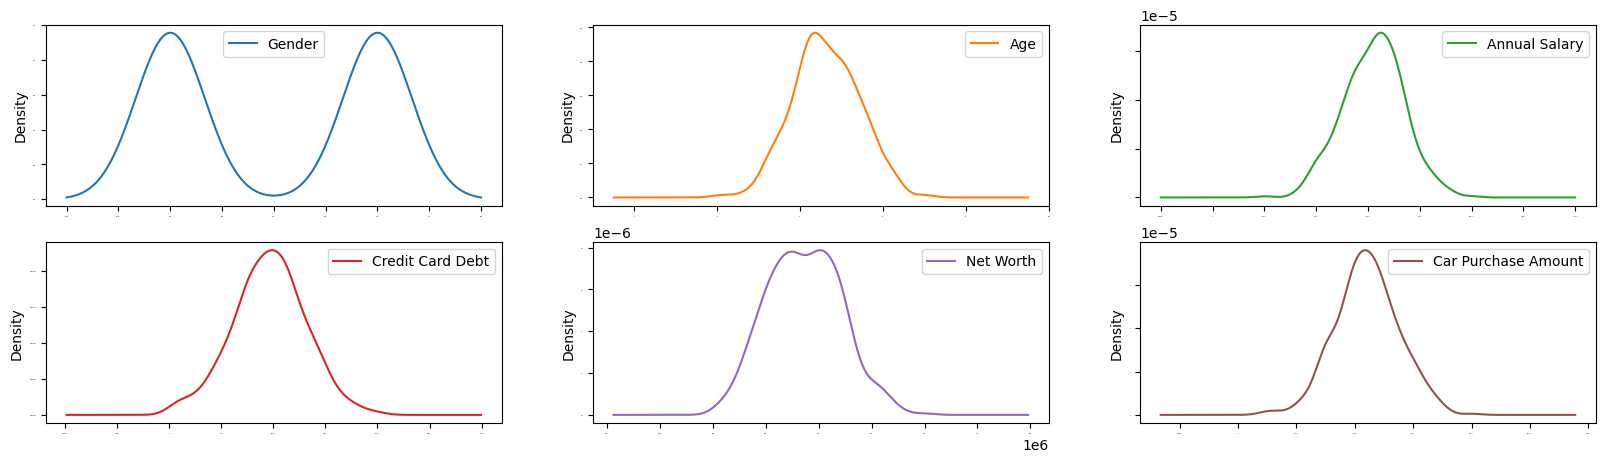

In [50]:
%matplotlib inline
numeric_fields.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(20,8))
plt.show()

Аналогично можем отметить, что все числовые поля, кроме Gender, имеет характер нормального распределения

3.d). Анализ корреляционной зависимости и многомерная визуализация
====
Далее проведём корреляционный анализ с целью определения зависимостей между полями.
Выведем корреляционную матрицу, где значения в ячейках показывают взаимосвязь между полями, указанными в заголовка столбца и строки соответственно.
Матрица является симметричной, на главной диагонали имеет значения 1 (поскольку признаки в строке и столбце одинаковы).

Значения корреляции варьируются в промежутке (-1.0; 1.0), где:
- значение -1.0 показывает полную антикорреляцию (рост значения первого приводит к уменьшению второго)
- значение 0.0 показывает отсутствие какой-либо корреляции (признаки полностью независимы друг от друга)
- значение 1.0 показывает полную корреляцию (рост значения первого признака приводит к увеличению второго)

Выведем корреляционную матрицу в виде числовой таблицы

In [54]:
correlation = numeric_fields.corr()
correlation

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000,-7.543e-02,-8.627e-02,-0.026,-0.061,-0.120
Age,-0.075,1.000e+00,3.607e-04,0.032,0.022,0.633
Annual Salary,-0.086,3.607e-04,1.000e+00,0.050,0.015,0.618
Credit Card Debt,-0.026,3.175e-02,4.960e-02,1.000,-0.049,0.029
Net Worth,-0.061,2.179e-02,1.477e-02,-0.049,1.000,0.489
Car Purchase Amount,-0.120,6.333e-01,6.179e-01,0.029,0.489,1.000


Поскольку больше всего нас интересует зависимость целевого признака от всех остальных, то выведемсодержимое столбца целевого признака и отсортируем в порядке убывания. В начале списка будут признаки с наибольшей корреляцией.

In [56]:
correlation['Car Purchase Amount'].sort_values(ascending=False)

Car Purchase Amount    1.000
Age                    0.633
Annual Salary          0.618
Net Worth              0.489
Credit Card Debt       0.029
Gender                -0.120
Name: Car Purchase Amount, dtype: float64

У признаков Age, Annual Salary и Net Worth наблюдается сильная корреляция с признаком Car Purchase Amount.

Также визуализируем корреляционную матрицу в виде двухмерного графика ("тепловой карты").

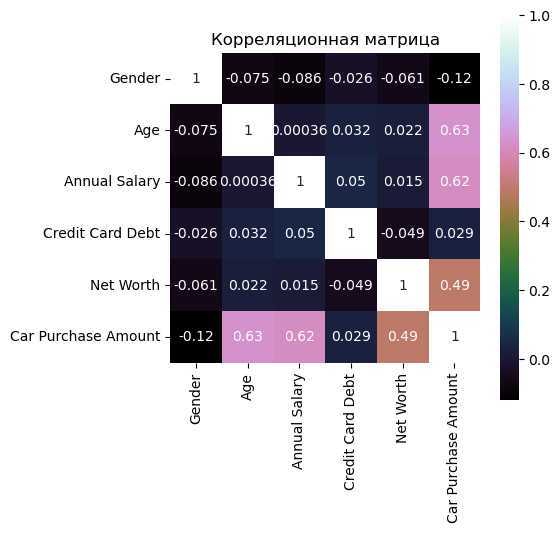

In [59]:
plt.figure(figsize=(5,5))
plt.title('Корреляционная матрица')
sns.heatmap(correlation, vmax=1,square=True,annot=True,cmap='cubehelix')
plt.show()

Здесь показывается та же информация, но цветами кодируется значение корреляции, наибольшая корреляция отмечается белым, сильная - голубым и розовым, а слабая - тёмнно-синим, сходящимся к чёрному в случае её отсутствия.

Также выводим матрицу диаграммы рессеяния. В плане соотношения строк и столбцов она аналогична корреляционной (на главной диагонали - взаимосвязь признака с самим собой, вне её - между двумя признаками).

На главной диагонали по существу будут отражены графики плотности соответствующего признака.

Вне главной диагонали отображаются двухмерные графики, где координаты кодируют значения признаков, а точками отмечаются конкретные записи из набора данных (их координаты соответствуют значениям признаков этих записей).

Если такой график выглядит, как круглое облако точек, то можно считать, что корреляция отсутствует. Если же для облака прослеживается направленный тренд - то наблюдается корреляция между двумя этими признаками.

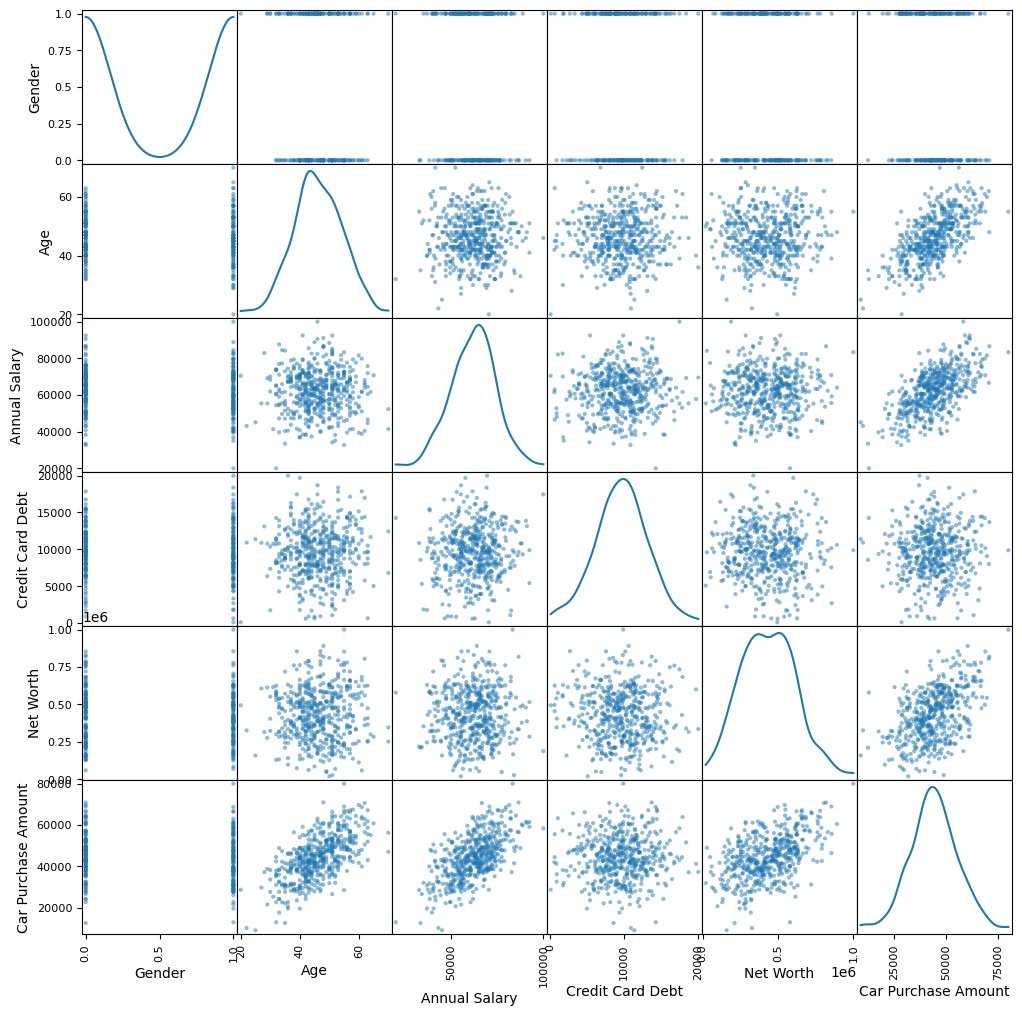

In [62]:
pd.plotting.scatter_matrix(numeric_fields, figsize=(12,12), diagonal='kde')
plt.show()

Для каждой пары аттрибутов (ячейка вне главной диагонали) на диаграмме в виде двухмерного графика точками отражаются их координаты.

Для Age и Annual Salary можем отметить направленный тренд относительно Car Purchase Amount - чем выше Age и Annual Salary, тем выше. 

Для Net Worth он менее выражен.

Графики связи поля Gender с другими в силу бинарного характера значений имеют характер двух плоских "линий" из точек. 

3.с). Очистка данных
===

Как отмечено ранее, поле Gender заполнено не для всех записей, и, следовательно, нуждается в очистке.
Попробуем произвести очистку, убрав строчки с пустыми значениями.

In [66]:
cleaned_data = numeric_fields.copy()
cleaned_data = cleaned_data.dropna(subset=["Gender"])
#gender_median = data["Gender"].median()
#cleaned_data["Gender"] = cleaned_data["Gender"].fillna(gender_median)
cleaned_data

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0.0,42,62812.093,11609.381,238961.250,35321.459
1,0.0,41,66646.893,9572.957,530973.908,45115.526
4,1.0,57,59729.151,5358.712,560304.067,55915.462
5,1.0,57,68499.852,14179.472,428485.360,56611.998
6,1.0,47,39814.522,5958.460,326373.181,28925.705
...,...,...,...,...,...,...
485,1.0,60,39460.003,8769.290,571245.371,47443.744
487,0.0,43,50051.140,893.235,347177.837,32553.534
492,0.0,55,72424.801,9831.185,523680.770,60117.679
493,0.0,43,77665.172,13308.879,349588.561,47760.664


Проверим, сколько записей пришлось отбросить в связи с отсутствием данных.

In [68]:
print(data.shape[0] - cleaned_data.shape[0])
print(f'{(data.shape[0]-cleaned_data.shape[0])/data.shape[0]*100.0:.2f}%')

256
51.20%


Отметим, что пришлось отбросить 51.20% записей, т.е. больше половины. Отбрасывание такого количества данных значительно ухудшит качество модели.

Произведём анализ корреляции по полю Gender. Если по заполненным строкам она не покажет значимого прироста, значит поле можно считать неинформативным относительно целевого признака, и лучше убрать его из исходного набора и оставить все записи, чем избавляться от тех, где оно незаполнено, но присутствуют все остальные данные.

Выводим графики плотности для числовых полей:

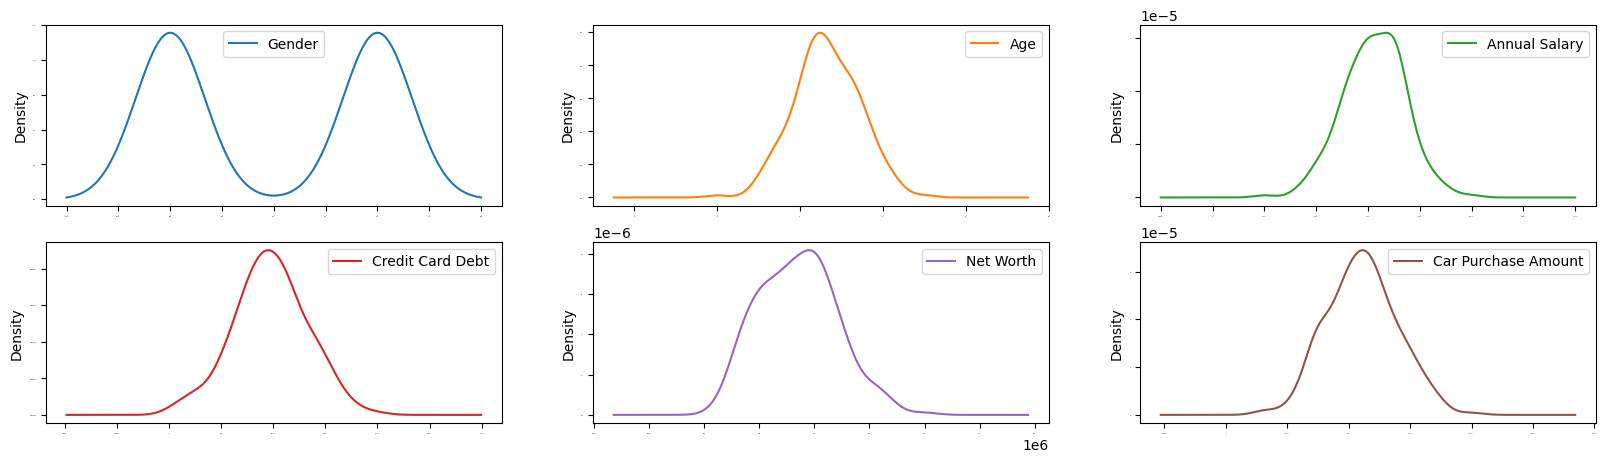

In [71]:
%matplotlib inline
cleaned_data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(20,8))
plt.show()

Выводим корреляционную матрицу

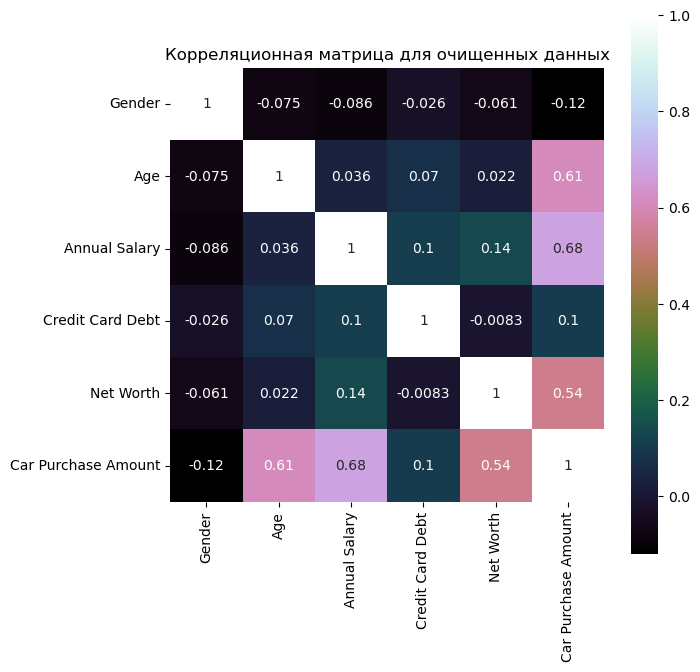

In [73]:
correlation_cleaned = cleaned_data.corr()
plt.figure(figsize=(7,7))
plt.title('Корреляционная матрица для очищенных данных')
sns.heatmap(correlation_cleaned, vmax=1,square=True,annot=True,cmap='cubehelix')
plt.show()

Очищенные данные не показывают сильной корреляции поля Gender с другими, при этом для очистки нам потребовалось отбросить больше половины данных. 
Для повышения точности дальнейшей обработки лучше принять другую стратегию очистки - отбросить поле Gender.

Произведём очистку данных для поля Gender по новой стратегии - отбросим само это поле.

In [76]:
cleaned_data = numeric_fields.copy()
cleaned_data = cleaned_data.drop("Gender", axis=1)

cleaned_data.head()

,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,42,62812.093,11609.381,238961.250,35321.459
1,41,66646.893,9572.957,530973.908,45115.526
2,43,53798.551,11160.355,638467.177,42925.709
3,58,79370.038,14426.165,548599.052,67422.363
4,57,59729.151,5358.712,560304.067,55915.462


3.g). Преобразование категориального текстового признака в числовой 
===
Преобразуем выведенный категориальный признак TLD (для расширенного набора) в числовой.

In [78]:
label_enc = LabelEncoder()
domain_df["TLD_numeric"] = label_enc.fit_transform(domain_df["TLD"])
domain_df

,FullDomain,TLD,TLD_numeric
0,quisaccumsanconvallis.edu,edu,2
1,diam.co.uk,uk,5
2,ametconsectetueradipiscing.co.uk,uk,5
3,dignissim.com,com,1
4,egetmollislectus.net,net,3
...,...,...,...
495,Cumsociis.ca,ca,0
496,Sedmolestie.edu,edu,2
497,massanonante.com,com,1
498,arcuVivamussit.net,net,3


3.e). Создание расширенного набора данных. Добавление атрибутов
===
Подготовим расширенный набор данных с дополнительными полями.
Добавим следующие признаки:
- Leverage - соотношение годовой зарплаты к долгу по кредитной карте
- Sales Price Ratio - сколько машин за целевую стоимость можно купить за общее состояние клиента
- TLD - домен верхнего уровня, выведенный ранее из поля электронной почты категориальный признак

In [80]:
extended_data = cleaned_data.copy()
# Долгоая нагрузка
extended_data["Leverage"] = extended_data["Annual Salary"] / extended_data["Credit Card Debt"]  
extended_data["Sales Price Ratio"] = extended_data["Net Worth"] / extended_data["Car Purchase Amount"]
extended_data["TLD"] = domain_df["TLD_numeric"]
#extended_data["TLD"] = 
#extended_data["Projected Net Worth"] = extended_data["Car Purchase Amount"] + extended_data["Net Worth"]
# Добавляем его в словарь

3.f). Оценка информативности признаков
====
Произведём анализ информативности признаков для базового и расширенного наборов.
Информативность показывает, насколько хорошо данный признак объясняет целевой.

In [82]:
# Исходный набор
features = 4
data_X = cleaned_data.iloc[:,:features]
data_Y = cleaned_data["Car Purchase Amount"]

bestfeatures = SelectKBest(f_regression, k=features)
fit = bestfeatures.fit(data_X,data_Y)
dfscores = pd.Series(fit.scores_)
dfcolumns = pd.Series(data_X.columns)
featureScores = pd.concat([dfcolumns,dfscores],keys=["Column","Score"],axis=1)
featureScores.sort_values("Score", ascending = False)

,Column,Score
0,Age,333.433
1,Annual Salary,307.503
3,Net Worth,156.153
2,Credit Card Debt,0.416


In [83]:
# Расширенный набор
ext_features_start = 6
ext_data_X = extended_data.drop("Car Purchase Amount", axis=1)
ext_data_Y = extended_data["Car Purchase Amount"]

bestfeatures = SelectKBest(f_regression, k=features)
fit = bestfeatures.fit(ext_data_X,ext_data_Y)
dfscores = pd.Series(fit.scores_)
dfcolumns = pd.Series(ext_data_X.columns)
featureScoresExt = pd.concat([dfcolumns,dfscores],keys=["Column","Score"],axis=1)
featureScoresExt.sort_values("Score", ascending = False)

,Column,Score
0,Age,333.433
1,Annual Salary,307.503
3,Net Worth,156.153
5,Sales Price Ratio,26.219
6,TLD,2.579
4,Leverage,0.517
2,Credit Card Debt,0.416


Наиболее информативными признками являются возраст (Age), годовая зарплата (Annual Salary) и общее состояние (Net Worth).

Производные признаки Leverage и Sales Price Ratio имеют значительно меньшую информативность.

TLD и Credit Card Debt имеют очень низкую информативность. Их можно отбросить при составлении модели, так как они слабо объясняют целевой признак и окажут незначительное влияние на способность модели прогнозировать целевой признак.

Однако для полноты картины расширенного набора оставим эти признаки. 

4). Подготовка наборов данных
===
Подготовим словарь для наборов данных. В него должны будут входить 4 набора данных:
- Исходный набор
- Расширенный набор
- Исходный масштабированный
- Расширенный масштабированный

Сразу добавляем в него очищенные в качестве исходного набора, а также расширенные данные.

In [86]:
datasets = {
    "original": { "data": cleaned_data },
    "extended": { "data": extended_data }
}

4.1). Масштабирование данных (он же 3.h)
====
Далее необходимо масштабировать данных для исходного и расширенного наборов данных.

Выполняем Min-Max масштабирование для двух наборов данных с помощью MinMaxScaler (по варианту).

Масштабированные наборы добавляем в словарь наборов.

In [88]:
for dataset in ["original", "extended"]:
    scaler = MinMaxScaler()
    ds = datasets[dataset]["data"].copy()
    ds[ds.columns] = scaler.fit_transform(ds)
    datasets[f"{dataset}_scaled"] = { "data": ds }

datasets

{'original': {'data':      Age  Annual Salary  Credit Card Debt   Net Worth  Car Purchase Amount
  0     42      62812.093         11609.381  238961.250            35321.459
  1     41      66646.893          9572.957  530973.908            45115.526
  2     43      53798.551         11160.355  638467.177            42925.709
  3     58      79370.038         14426.165  548599.052            67422.363
  4     57      59729.151          5358.712  560304.067            55915.462
  ..   ...            ...               ...         ...                  ...
  495   41      71942.403          6995.903  541670.102            48901.443
  496   38      56039.498         12301.457  360419.099            31491.415
  497   54      68888.778         10611.607  764531.320            64147.289
  498   59      49811.991         14013.035  337826.638            45442.154
  499   47      61370.678          9391.342  462946.492            45107.226
  
  [500 rows x 5 columns]},
 'extended': {'data':     

4.2). Подготовка наборов данных для использования в предиктивном анализе
====
Для каждой из 4 выборок определяем наборы обучающих и тестовых данных в классическом соотношении (80%/20% соответственно).
В каждом из наборов разделим признаки поиска (X) и целевой признак (Y) в две отдельные таблицы.

In [90]:
for key, value in datasets.items():
    train_data, test_data = train_test_split(value["data"], test_size=0.2, random_state=777)
    value["train"] = train_data
    value["test"] = test_data
    for group in ["train", "test"]:
        value[f"{group}_X"] = value[group].drop("Car Purchase Amount", axis=1)
        value[f"{group}_Y"] = value[group]["Car Purchase Amount"]
        print(f"Dataset: {key} | Group: {group}")
        print("X:")
        print(value[f"{group}_X"].head())
        print("\nY:")
        print(value[f"{group}_Y"].head())
        print("\n")

Dataset: original | Group: train
X:
     Age  Annual Salary  Credit Card Debt   Net Worth
429   44      59801.063          8042.387  601744.961
135   48      53870.485         14720.534  701782.528
335   61      51086.885         12254.539   59630.078
222   47      61063.356         12066.266  509543.086
337   35      56807.017          8851.565  385250.716

Y:
429    45593.685
135    48622.661
335    39911.612
222    46892.266
337    30826.109
Name: Car Purchase Amount, dtype: float64


Dataset: original | Group: test
X:
     Age  Annual Salary  Credit Card Debt   Net Worth
424   37      51111.766          9057.601  461366.783
46    42      56098.508         11675.285  320228.645
420   55      63186.128          7122.164  762601.084
122   53      65809.108          4820.839  692401.467
224   42      61693.444         10835.257  620522.384

Y:
424    31408.626
46     34215.762
420    62028.712
122    59416.181
224    45509.697
Name: Car Purchase Amount, dtype: float64


Dataset: extend

5). Предиктивный анализ данных на двух заданных видах моделей
=

5.1). Применение лассо-регрессии
===
Применим лассо-регрессию к каждому из 4 наборов данных и проанализируем показатели среднеквадратичной ошибки (RMSE) и коэффициента детерминации (R^2)
Для каждого набора данных выполним следующие операции:
1. Создаём отдельную модель лассо-регрессии (чтобы в её обучении участвовал только один набор)
2. Обучаем модель на выделенной ранее обучающей выборке (в словаре признаки для поиска содержатся под ключом train_X и целевой признак в train_Y)
3. С помощью обученной модели произведём прогнозирование целевого признака на тестовой выборке
4. Сравнивая полученные прогнозные значения и реальные значения целевого признака в тестовой выборке, найдём значения RMSE и R^2

In [93]:
# Применяем лассо-регрессию к каждому из наборов данных
print("Результаты применения лассо-регрессии:")
for key, dataset in datasets.items():
    # При слишком высоких значениях alpha происходит сжатие результата для масштабируемых наборов
    lasso = Lasso(alpha=0.0001)
    # Обучаем модель на обучающей выборке
    lasso.fit(dataset["train_X"], dataset["train_Y"])
    dataset["lasso"] = lasso
    # Прогнозируем целевые значения на тестовой выборке
    lasso_predict = lasso.predict(dataset["test_X"])
    dataset["lasso_predict"] = lasso_predict
    # Ищем среднеквадратичную ошибку
    dataset["lasso_rmse"] = np.sqrt(mean_squared_error(dataset["test_Y"], lasso_predict))
    # Ищем значение R^2 (коэффициент детерминации, насколько хорошо модель прогнозирует данные)
    dataset["lasso_r2"] = r2_score(dataset["test_Y"], lasso_predict)
    print(f"Набор: {key} | RMSE: {(dataset["lasso_rmse"])} | R2: {(dataset["lasso_r2"])}")

Результаты применения лассо-регрессии:
Набор: original | RMSE: 247.00454048528255 | R2: 0.9995126642772921
Набор: extended | RMSE: 248.51620822919526 | R2: 0.9995066810353532
Набор: original_scaled | RMSE: 0.0036587690814365507 | R2: 0.9994609797610448
Набор: extended_scaled | RMSE: 0.0036657938316845937 | R2: 0.9994589079617858


Выводим графики с ожидаемыми согласно тестовой выборке (красным) и прогнозными/полученными через модель (зелёным) значениями.

График визуализирует отклонение прогнозных от ожидаемых значений.

По оси X - индекс элемента тестовой выборки, по оси Y - целевое значение (Сar Purchase amount)

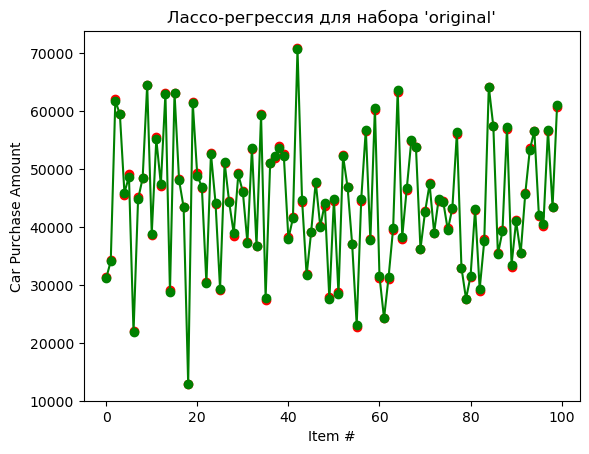

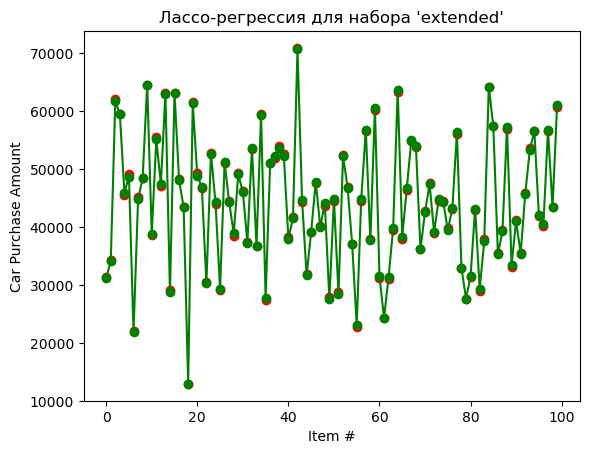

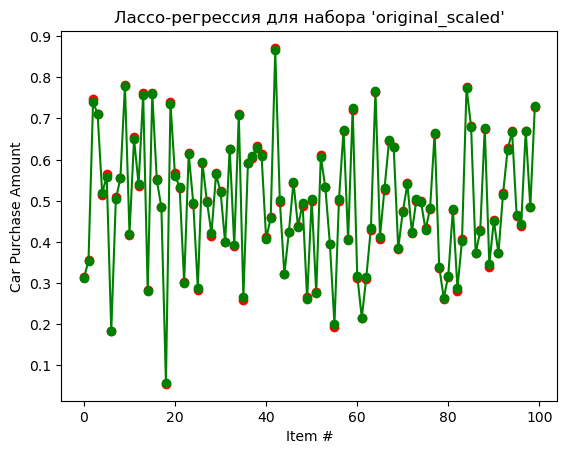

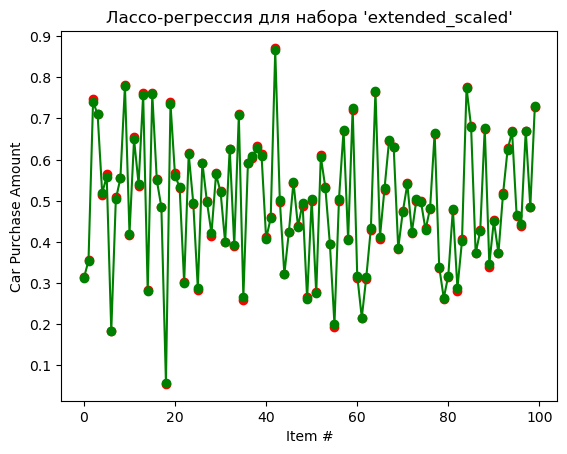

In [95]:
x_values = [i for i in range(0, len(datasets["original"]["test_Y"]))]
for key, dataset in datasets.items():
    plt.title(f"Лассо-регрессия для набора '{key}'")
    plt.plot(x_values,dataset["test_Y"],"ro")
    plt.plot(dataset["lasso_predict"], "go")
    plt.plot(dataset["lasso_predict"], "g-")
    plt.xlabel("Item #")
    plt.ylabel("Car Purchase Amount")
    plt.show()

5.2). Применение полинамиальной регрессии
===
Аналогично применим полиномиальную регруссию к каждому из 4 наборов данных и анализируем показатели RMSE и R^2.
Для каждого набора данных выполним следующие операции:
1. Создаём расширенный набор со степенями признаков для полиномиальной регрессии
2. С помощью полученного набора преобразуем элементы обучающей и тестовой выборок для их расширения дополнительными полиномиальными признаками
3. Создаём отдельную модель линейной регрессии (чтобы в её обучении участвовал только один набор)
4. Обучаем модель на выделенной ранее обучающей выборке (в словаре признаки для поиска содержатся под ключом train_X и целевой признак в train_Y)
5. С помощью обученной модели произведём прогнозирование целевого признака на тестовой выборке
6. Сравнивая полученные прогнозные значения и реальные значения целевого признака в тестовой выборке, найдём значения RMSE и R^2

In [97]:
print("Результаты применения полиномиальной регрессии:")
for key, dataset in datasets.items():
    poly = PolynomialFeatures(degree=2)
    train_X_poly = poly.fit_transform(dataset["train_X"])
    test_X_poly = poly.transform(dataset["test_X"])
    poly_reg = LinearRegression()
    poly_reg.fit(train_X_poly, dataset["train_Y"])
    poly_predict = poly_reg.predict(test_X_poly)
    dataset["poly_predict"] = poly_predict
    dataset["poly_rmse"] = np.sqrt(mean_squared_error(dataset["test_Y"], poly_predict))
    dataset["poly_r2"] = r2_score(dataset["test_Y"], poly_predict)
    print(f"Набор: {key} | RMSE: {(dataset["poly_rmse"]):.6f} | R2: {(dataset["poly_r2"]):.6f}") 

Результаты применения полиномиальной регрессии:
Набор: original | RMSE: 248.661926 | R2: 0.999506
Набор: extended | RMSE: 136.270545 | R2: 0.999852
Набор: original_scaled | RMSE: 0.003502 | R2: 0.999506
Набор: extended_scaled | RMSE: 0.001919 | R2: 0.999852


Графики строятся аналогично таковым для лассо-регрессии.

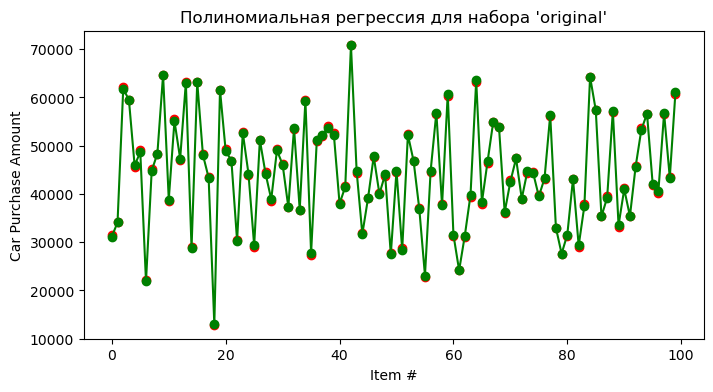

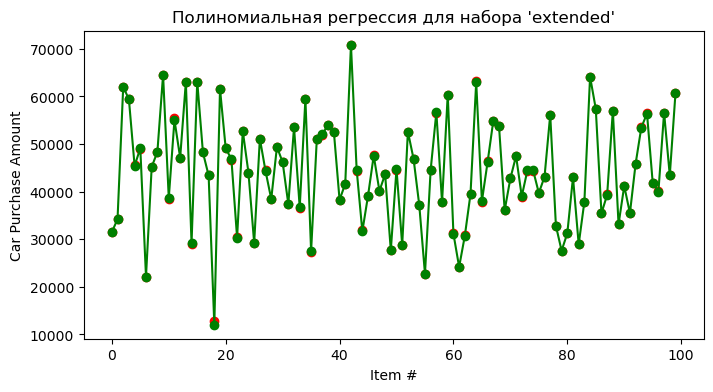

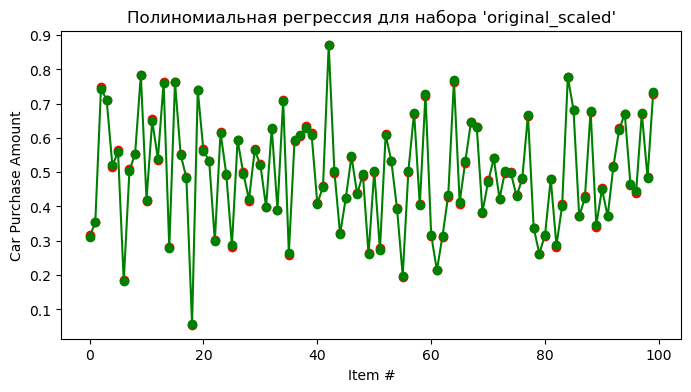

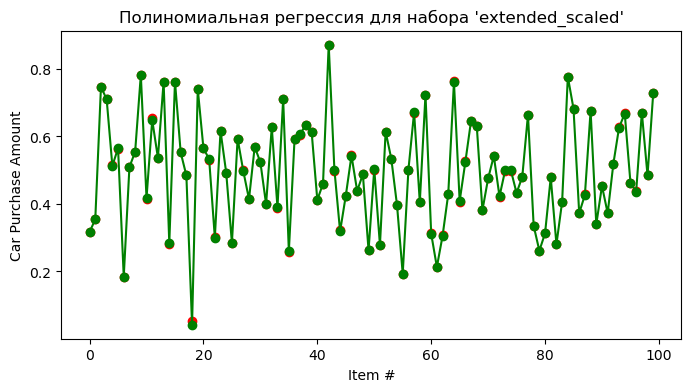

In [99]:
for key, dataset in datasets.items():
    plt.figure(figsize=(8, 4))
    plt.title(f"Полиномиальная регрессия для набора '{key}'")
    plt.plot(x_values,dataset["test_Y"],"ro")
    plt.plot(dataset["poly_predict"], "go")
    plt.plot(dataset["poly_predict"], "g-")
    plt.xlabel("Item #")
    plt.ylabel("Car Purchase Amount")
    plt.show()

5.3). Сравнение моделей
===
Проведём сравнение двух моделей для каждого набора данных по двум метрикам: RMSE и R^2.

По метрике RMSE лучшей будем считать ту модель, которая для заданного набора данных даёт меньшее значение RMSE (т.е. меньшую ошибку).

По метрике R^2 лучше будем считать ту модель, у которой дял заданного набора данных большее значение R^2 (т.е. модель точнее объясняет зависмость для тестового набора данных).

Преимущество по каждой метрике в каждом наборе будем засчитывать, как одно очко в пользу данной модели.
Лучшей будем считать ту модель, у которой очков окажется больше.

In [101]:
print("Лучшие модели по метрикам:")
total_lasso = 0;
total_poly = 0;
for key, dataset in datasets.items():
    best_by_rmse = "Полиномиальная" if (dataset["lasso_rmse"] > dataset["poly_rmse"]) else "Лассо"
    best_by_r2 = "Полиномиальная" if (dataset["lasso_r2"] < dataset["poly_r2"]) else "Лассо"
    if best_by_rmse == "Полиномиальная":
        total_poly += 1
    else:
        total_lasso += 1
    if best_by_r2 == "Полиномиальная":
        total_poly += 1
    else:
        total_lasso += 1
    print(f"Набор: {key} | RMSE: {best_by_rmse} | R2: {best_by_r2}") 
print("Всего очков:")
print(f"- Лассо: {total_lasso}")
print(f"- Полиномиальная: {total_poly}")
best_model = "Полиномиальная" if total_poly >= total_lasso else "Лассо"
print(f"Лучшая модель: {best_model}")

Лучшие модели по метрикам:
Набор: original | RMSE: Лассо | R2: Лассо
Набор: extended | RMSE: Полиномиальная | R2: Полиномиальная
Набор: original_scaled | RMSE: Полиномиальная | R2: Полиномиальная
Набор: extended_scaled | RMSE: Полиномиальная | R2: Полиномиальная
Всего очков:
- Лассо: 2
- Полиномиальная: 6
Лучшая модель: Полиномиальная


По результатам сравнения лучшей моделью при заданных значениях гиперпараметров оказалась полиномиальная регрессия.

6). Поиск лучшего гиперпараметра на обучающей выборке
===
Найдём лучшие значения гиперпараметров для каждого набора данных. Будем искать их для обеих моделей, хотя дальнейший анализ требуется только для лучшей из них (полиномиальной). Лучшим параметром будем считать тот, при котором значение средневадратичной ошибки минимально.

Сначала найдём значение на обучающей выборке каждого из наборов.


Лучший гиперпараметр (alpha): 0.001


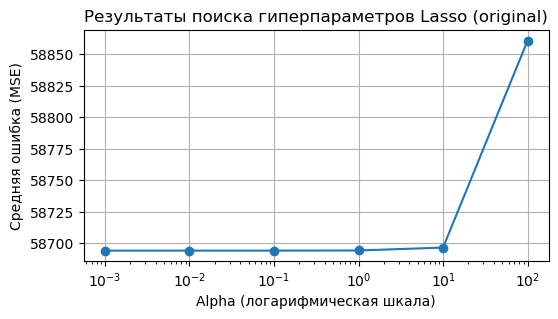


Лучший гиперпараметр (alpha): 100


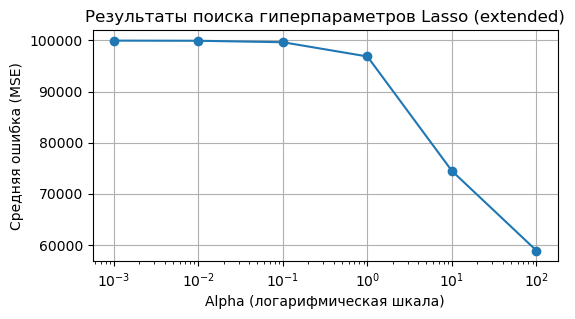


Лучший гиперпараметр (alpha): 0.001


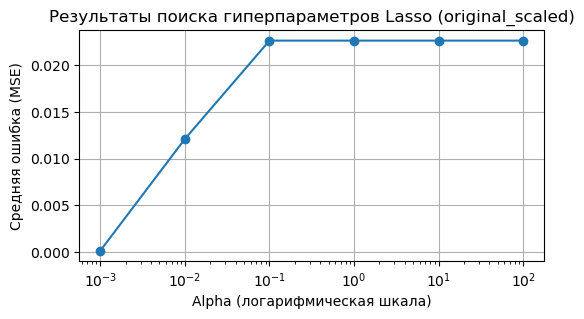


Лучший гиперпараметр (alpha): 0.001


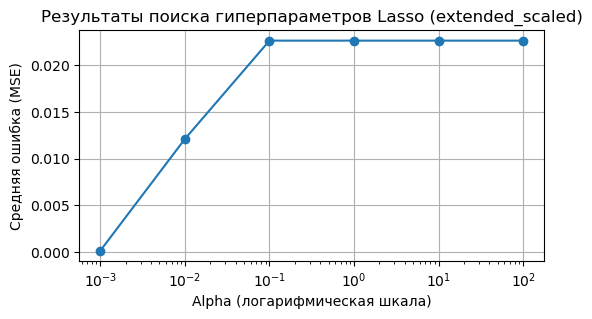

In [104]:
# 6. Grid поиск лучшего гиперпараметра регрессионной модели на обучающей выборке
# Определение диапазона значений для гиперпараметра alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
# Создание модели Lasso для поиска гиперпараметров
for key, dataset in datasets.items():
    lasso_grid = Lasso()
    # Настройка GridSearchCV
    grid_search = GridSearchCV(estimator=lasso_grid, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=5)
    # Обучение модели на обучающих данных
    grid_search.fit(dataset["train_X"], dataset["train_Y"])
    # Получение лучших параметров
    best_alpha = grid_search.best_params_['alpha']
    print(f"\nЛучший гиперпараметр (alpha): {best_alpha}")
    # Получение результатов поиска
    results = grid_search.cv_results_
    # Построение графиков результатов поиска
    plt.figure(figsize=(6, 3))
    plt.plot(param_grid['alpha'], -results['mean_test_score'], marker='o')
    plt.xscale('log')
    plt.xlabel('Alpha (логарифмическая шкала)')
    plt.ylabel('Средняя ошибка (MSE)')
    plt.title(f'Результаты поиска гиперпараметров Lasso ({key})')
    plt.grid()
    plt.show()

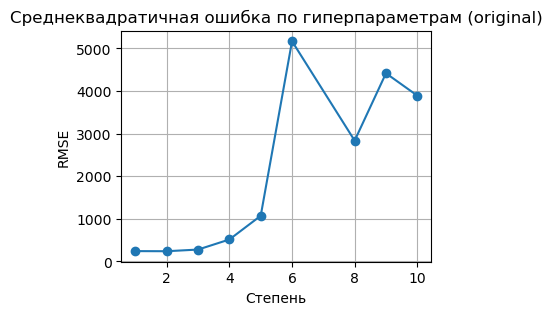

Лучшее значение гиперпараметра для набора original: 2


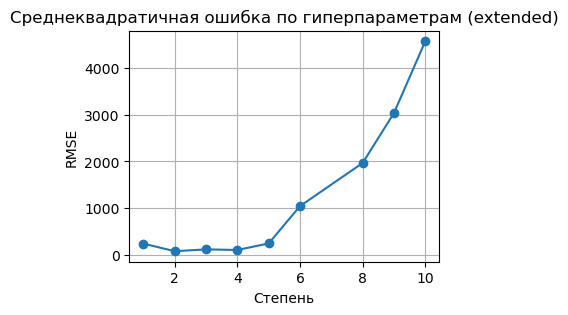

Лучшее значение гиперпараметра для набора extended: 2


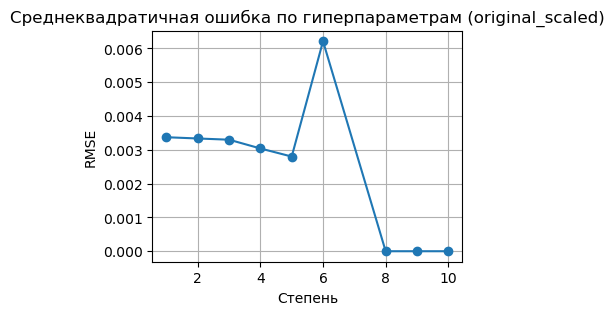

Лучшее значение гиперпараметра для набора original_scaled: 10


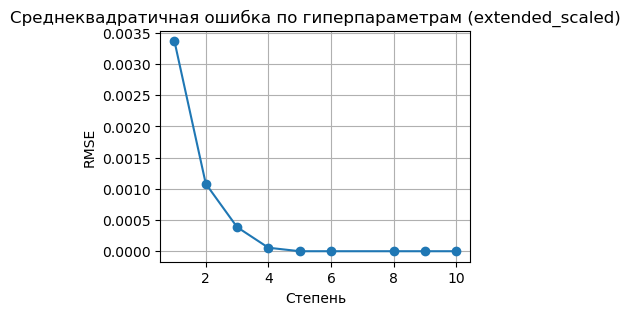

Лучшее значение гиперпараметра для набора extended_scaled: 6


In [105]:
Deg = [1, 2, 3, 4, 5, 6, 8, 9, 10]

for key, dataset in datasets.items():
    results_rmse=[]
    results_r2=[]
    names=[]
    for deg in Deg:
        X_train = dataset["train_X"]
        Y_train = dataset["train_Y"]
        polynomial_features = PolynomialFeatures(degree=deg)
        x_poly = polynomial_features.fit_transform(X_train)
        model = LinearRegression()
        model.fit(x_poly, Y_train)
        Y_poly_pred = model.predict(x_poly)
        rmse = np.sqrt(mean_squared_error(Y_train,Y_poly_pred))
        r2 = r2_score(Y_train, Y_poly_pred)
        results_rmse.append(rmse)
        results_r2.append(r2)
        names.append(deg)

    %matplotlib inline
    # Построение графиков результатов поиска (RMSE)
    plt.figure(figsize=(4, 3))
    plt.plot(names, results_rmse, marker='o')
    plt.xlabel('Степень')
    plt.ylabel('RMSE')
    plt.title(f'Среднеквадратичная ошибка по гиперпараметрам ({key})')
    plt.grid()
    plt.show()

    min_rmse = min(results_rmse)
    min_rmse_index = results_rmse.index(min_rmse)
    
    print(f'Лучшее значение гиперпараметра для набора {key}: {Deg[min_rmse_index]}')

7). Поиск лучшего гиперпараметра на тестовой выборке
===
Аналогично найдём оптимальные значения гиперпараметров на тестовой выборке, что может привести к необходимости корректировки значения.


Лучший гиперпараметр (alpha): 0.0001


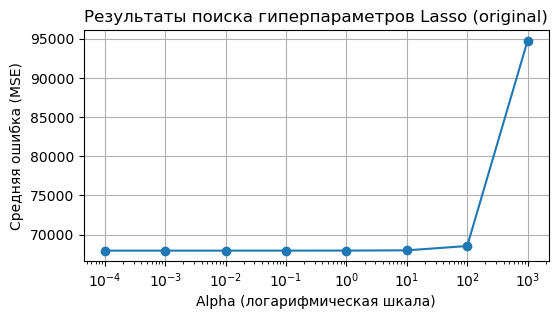


Лучший гиперпараметр (alpha): 100


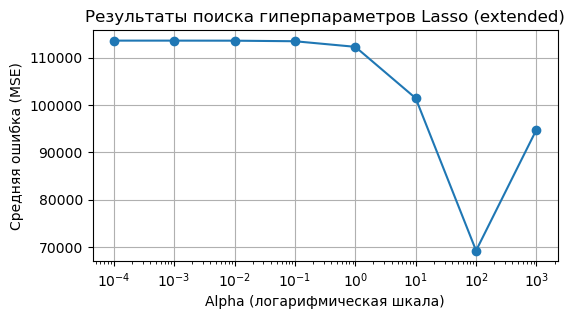


Лучший гиперпараметр (alpha): 0.0001


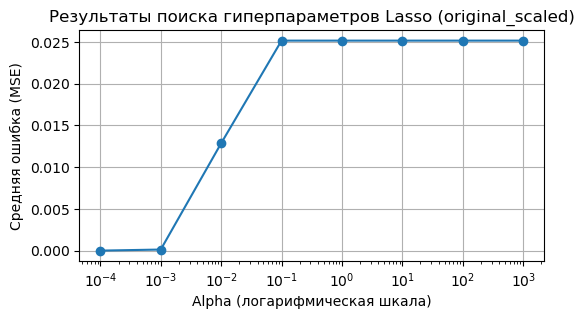


Лучший гиперпараметр (alpha): 0.0001


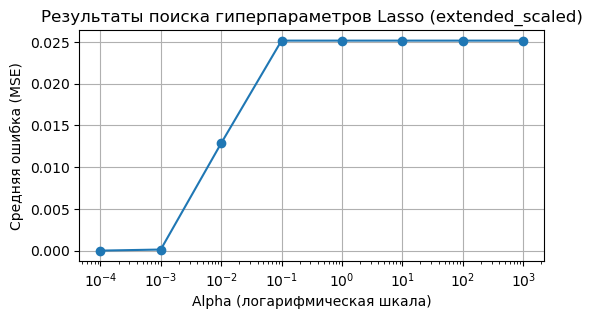

In [119]:
# 6. Grid поиск лучшего гиперпараметра регрессионной модели на тестовой выборке
# Определение диапазона значений для гиперпараметра alpha
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# Создание модели Lasso для поиска гиперпараметров
for key, dataset in datasets.items():
    lasso_grid = Lasso()
    # Настройка GridSearchCV
    grid_search = GridSearchCV(estimator=lasso_grid, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=5)
    # Обучение модели на обучающих данных
    grid_search.fit(dataset["test_X"], dataset["test_Y"])
    # Получение лучших параметров
    best_alpha = grid_search.best_params_['alpha']
    print(f"\nЛучший гиперпараметр (alpha): {best_alpha}")
    # Получение результатов поиска
    results = grid_search.cv_results_
    # Построение графиков результатов поиска
    plt.figure(figsize=(6, 3))
    plt.plot(param_grid['alpha'], -results['mean_test_score'], marker='o')
    plt.xscale('log')
    plt.xlabel('Alpha (логарифмическая шкала)')
    plt.ylabel('Средняя ошибка (MSE)')
    plt.title(f'Результаты поиска гиперпараметров Lasso ({key})')
    plt.grid()
    plt.show()

    best_y = grid_search.predict(dataset["test_X"])
    best_rmse = np.sqrt(mean_squared_error(dataset["test_Y"],best_y))
    best_r2 = r2_score(dataset["test_Y"], best_y)

    dataset["lasso_best_alpha"] = best_alpha
    dataset["lasso_best_rmse"] = best_rmse
    dataset["lasso_best_rmse_r2"] = min_rmse_r2

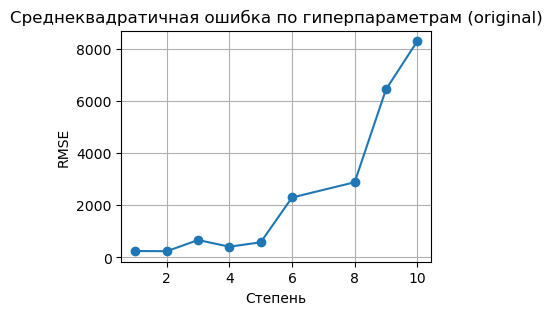

Лучшее значение гиперпараметра для набора original: 2


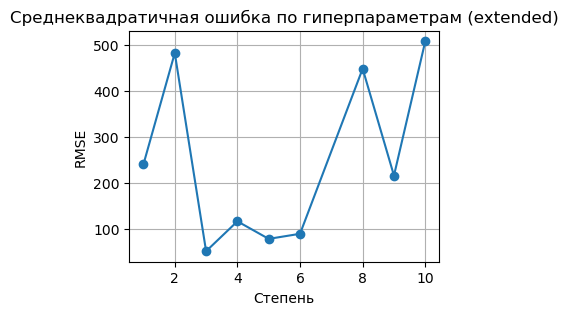

Лучшее значение гиперпараметра для набора extended: 3


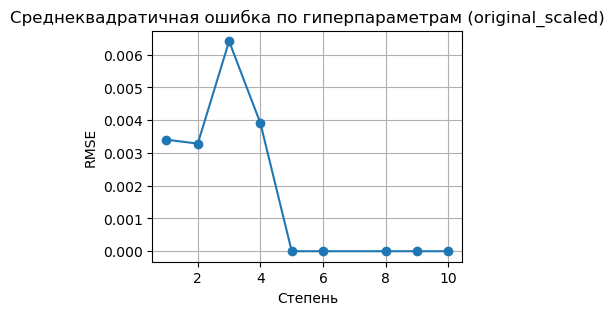

Лучшее значение гиперпараметра для набора original_scaled: 9


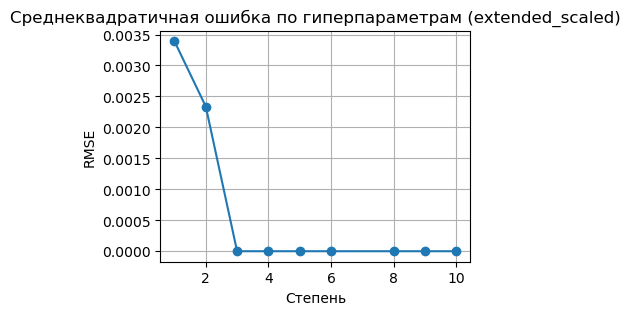

Лучшее значение гиперпараметра для набора extended_scaled: 5


In [120]:
Deg = [1, 2, 3, 4, 5, 6, 8, 9, 10]

for key, dataset in datasets.items():
    results_rmse=[]
    results_r2=[]
    names=[]
    for deg in Deg:
        X_test = dataset["test_X"]
        Y_test = dataset["test_Y"]
        polynomial_features = PolynomialFeatures(degree=deg)
        x_poly = polynomial_features.fit_transform(X_test)
        model = LinearRegression()
        model.fit(x_poly, Y_test)
        Y_poly_pred = model.predict(x_poly)
        rmse = np.sqrt(mean_squared_error(Y_test,Y_poly_pred))
        r2 = r2_score(Y_test, Y_poly_pred)
        results_rmse.append(rmse)
        results_r2.append(r2)
        names.append(deg)

    %matplotlib inline
    # Построение графиков результатов поиска (RMSE)
    plt.figure(figsize=(4, 3))
    plt.plot(names, results_rmse, marker='o')
    plt.xlabel('Степень')
    plt.ylabel('RMSE')
    plt.title(f'Среднеквадратичная ошибка по гиперпараметрам ({key})')
    plt.grid()
    plt.show()

    min_rmse = min(results_rmse)
    min_rmse_index = results_rmse.index(min_rmse)
    min_rmse_r2 = results_r2[min_rmse_index]

    dataset["poly_best_deg"] = names[min_rmse_index]
    dataset["poly_best_rmse"] = min_rmse
    dataset["poly_best_rmse_r2"] = min_rmse_r2
    
    print(f'Лучшее значение гиперпараметра для набора {key}: {Deg[min_rmse_index]}')

8). Выводы
===

В рамках лабораторной работы произведён разведочный и предиктивный анализ входной выборки данных (данные о клиентах и сумме, которую они готовы потратить на покупку автомобиля).

В ходе разведочного анализа проанализирован общий характер данных (таблица из 500 записей с 10 признаками).
Текстовые признаки проанализированы на предмет уникальности значений, из признака Customer e-mail путём текстовой обработки выделен категориальный признак "домен первого уровня" (TLD), который далее был добавлен в расширенный набор данных. Уникальные текстовые поля очищены, также как и числовое поле индекса записи (Unnamed: 0).

Поле Gender в исходной выборке частично недозаполнено, и имеет низкую степень корреляции с целевым признаком (как и с другими). При отбрасывании строк с отсутствующими значениями значимого изменения корреляции не обнаружено, поэтому принято решение убрать поле из выборки.

Были подготовлены 4 набора данных:
- исходный (в очищенном виде)
- расширенный (два производных числовых поля и описанный выше TLD)
- исходный масштабированный (через Min-max масштабирование)
- расширенный машстабированный (через Min-max масштабирование)

Каждый набор был разделён на обучающую и тестовую выборки в классическом соотношении 80:20.

Для каждого набора были обучены модели лассо- и полиномиальной регрессии. Произведено сравнение моделей, в ходе которого полиномиальная модель со степенью 2 дала лучшие результаты, чем лассо-регрессия с коэффициентом alpha = 0.0001

Далее для обеих моделей на каждом из наборов как для обучающей, так и для тестовой выборки был подобран лучший гиперпараметр.

Для обучающей были получены следующие результаты:
- original: 2
- extended: 3
- original_scaled: 10 
- extended_scaled: 6

Для тестовой были получены следующие результаты:
- original: 2
- extended: 3
- original_scaled: 8 
- extended_scaled: 4

Для наборов original и extended значения идентичны, следовательно, в корректировке не нуждаются.
Для масштабированных выборок можно понизить степень параметра на 1 (оно является не самым лучшим, но близким к лучшему, и для обучающей выборки).

## 9). Экспорт полученных данных для использования в ЛР №2
Для использования во второй лабораторной работе для каждой модели применительно к каждому набору данных экспортируем значения гиперпараметров, RMSE и R^2. Их будем использовать для сравнения с моделями, рассматриваемыми в ЛР2.

In [127]:
import json

datasets_export = dict()

for key, dataset in datasets.items():
    datasets_export[key] = {
        "dataset": key,
        "models" : {
            "lasso" : {
                "best_params": { "alpha": dataset["lasso_best_alpha"] },
                "best_rmse": dataset["lasso_best_rmse"],
                "best_rmse_r2": dataset["lasso_best_rmse_r2"],
            },
            "poly" : {
                "best_params": { "deg": dataset["poly_best_deg"] },
                "best_rmse": dataset["poly_best_rmse"],
                "best_rmse_r2": dataset["poly_best_rmse_r2"],
            }
        }
    }

with open("LR1_results.json", "w") as file:
    json.dump(datasets_export, file, ensure_ascii=False, indent=1)